In [99]:
import os
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import AgglomerativeClustering

In [54]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [55]:
# Apriori Preparation
#
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [8]:
# pd.DataFrame(df.Hat.value_counts())

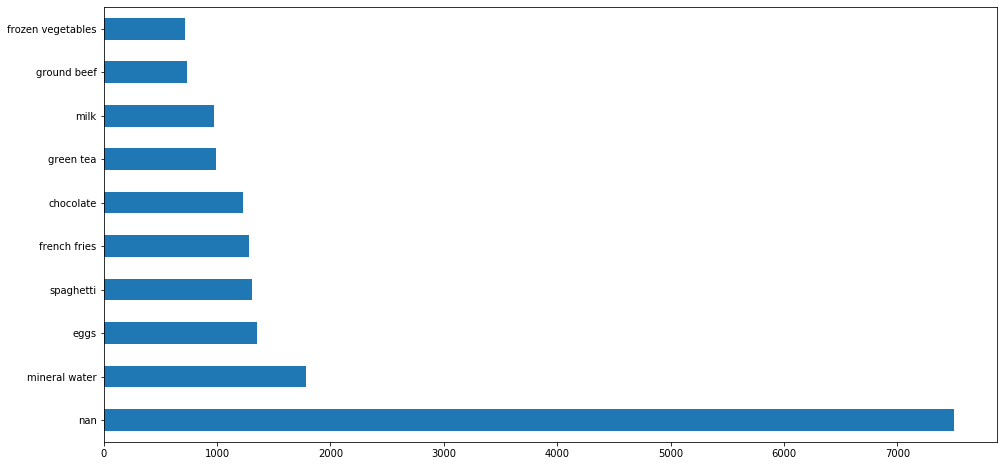

In [145]:
# Visualization
#
count = df.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(10)
plt.figure(figsize=(16,8))
pop_item.plot.barh()

In [56]:
# Apply APRIORI Algorith based on Support
#
apriori(df,min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [57]:
# Apply APRIORI Algorith based on Support with columns names
#
frequent_itemsets = apriori(df,min_support=0.6,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


In [58]:
# Apply ASSOCIATION rules based on Confidence
#
association_rules(frequent_itemsets, metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [59]:
# Apply ASSOCIATION rules based on Lift
#
association_rules(frequent_itemsets, metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# Let's do with Market Basket Optimisation Data

In [100]:
# READING THE DATASET
#
# Check if New path exists
if os.path.exists("/Users/saiffallah.GREENTNS/Desktop/Formation/AI/GOMYCODE/Dataset/8-AssociationRules") :
    # Change the current working Directory    
    os.chdir("/Users/saiffallah.GREENTNS/Desktop/Formation/AI/GOMYCODE/Dataset/8-AssociationRules")
else:
    print("Can't change the Current Working Directory")  

In [101]:
mbo_df = pd.read_csv("Market_Basket_Optimisation.csv",sep=',',header=None)

In [102]:
mbo_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
mbo_df.shape

(7501, 20)

In [104]:
# CHECK FOR DATA'S TYPE
#
print(mbo_df.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object


In [20]:
# CHECK FOR NULLS IN THE DATAFRAME
#
mbo_df.isnull().sum() 

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [107]:
# Convert DataFrame
#
transactions = []
for i in range(0, 7501):
    transactions.append([str(mbo_df.values[i,j]) for j in range(0, 20)])

In [108]:
# Apriori Preparation
#
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
# List of column names
#
for col in df.columns:
    print(col)

 asparagus
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray
bramble
brownies
bug spray
burger sauce
burgers
butter
cake
candy bars
carrots
cauliflower
cereals
champagne
chicken
chili
chocolate
chocolate bread
chutney
cider
clothes accessories
cookies
cooking oil
corn
cottage cheese
cream
dessert wine
eggplant
eggs
energy bar
energy drink
escalope
extra dark chocolate
flax seed
french fries
french wine
fresh bread
fresh tuna
fromage blanc
frozen smoothie
frozen vegetables
gluten free bar
grated cheese
green beans
green grapes
green tea
ground beef
gums
ham
hand protein bar
herb & pepper
honey
hot dogs
ketchup
light cream
light mayo
low fat yogurt
magazines
mashed potato
mayonnaise
meatballs
melons
milk
mineral water
mint
mint green tea
muffins
mushroom cream sauce
nan
napkins
nonfat milk
oatmeal
oil
olive oil
pancakes
parmesan cheese
pasta
pepper
pet food
pickles
protein bar
red wine
rice
salad
salmon
salt
sandwich
shallot
sha

In [132]:
# Delete nan column from data frame
#
df_final = df.drop(['nan'], axis = 1)
df_final

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


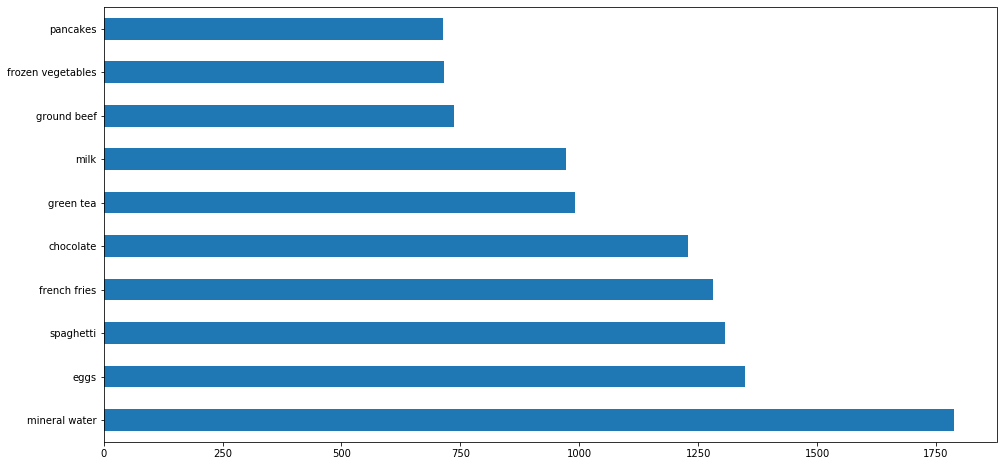

In [144]:
# Visualization
#
count = df_final.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(10)
plt.figure(figsize=(16,8))
pop_item.plot.barh()

In [ ]:
# Suppose we want to find the association of items with a product which is sold at least 3 times a day. 
# So, the minimum support here will be 2 items per day multiplied by 7 days of weak and divided by the total number of transactions. 
# That means (2*7)/7501 =  0.00186. So the equivalent 0.002 is taken here as support. 

In [133]:
# Apply APRIORI Algorith based on Support
#
apriori(df_final,min_support=0.002)

,support,itemsets
0,0.020397,(1)
1,0.008932,(2)
2,0.004666,(3)
3,0.033329,(4)
4,0.004533,(5)
5,0.008666,(6)
6,0.010799,(7)
7,0.014265,(8)
8,0.009199,(9)
9,0.011465,(10)


In [134]:
# Apply APRIORI Algorith based on Support with columns names
#
frequent_itemsets = apriori(df_final,min_support=0.002,use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)


In [135]:
# Apply ASSOCIATION rules based on Lift
#
association_rules(frequent_itemsets, metric="lift",min_threshold=7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh tuna),(fromage blanc),0.022264,0.013598,0.002400,0.107784,7.926383,0.002097,1.105564
1,(fromage blanc),(fresh tuna),0.013598,0.022264,0.002400,0.176471,7.926383,0.002097,1.187251
2,(pasta),(mushroom cream sauce),0.015731,0.019064,0.002666,0.169492,8.890601,0.002366,1.181127
3,(mushroom cream sauce),(pasta),0.019064,0.015731,0.002666,0.139860,8.890601,0.002366,1.144312
4,"(pasta, escalope)",(mushroom cream sauce),0.005866,0.019064,0.002533,0.431818,22.650826,0.002421,1.726447
5,"(pasta, mushroom cream sauce)",(escalope),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545
6,"(escalope, mushroom cream sauce)",(pasta),0.005733,0.015731,0.002533,0.441860,28.088096,0.002443,1.763482
7,(pasta),"(escalope, mushroom cream sauce)",0.015731,0.005733,0.002533,0.161017,28.088096,0.002443,1.185086
8,(escalope),"(pasta, mushroom cream sauce)",0.079323,0.002666,0.002533,0.031933,11.976387,0.002321,1.030232
9,(mushroom cream sauce),"(pasta, escalope)",0.019064,0.005866,0.002533,0.132867,22.650826,0.002421,1.146461
